### Tarea 8.4

Considere la función $f(x) = 4 x^3 - 3x^2 + x -5$. Use sólo dos puntos para interpolar usando una spline cúbica entre $x =-1$ y $x = 1$. Haga lo mismo con 4 puntos equidistantes. Explique por qué la spline cúbica es diferente del polinomio original si ambos son polinomios cúbicos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x): # se define la función que va a ser interpolada
    return 4*x**3-3*x**2+x-5

Text(0, 0.5, 'f(x)')

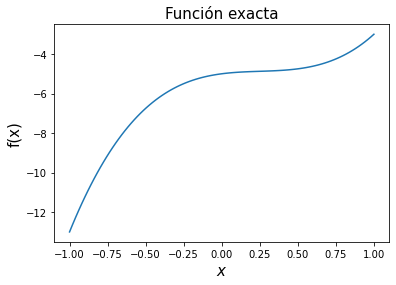

In [3]:
x = np.linspace(-1,1,100) # se muestra la forma de la función en el rango [-1,1]
plt.plot(x,f(x))
plt.title('Función exacta',size=15)
plt.xlabel('$x$',size=15)
plt.ylabel('f(x)',size=15)

Para realizar la interpolación con una spline cúbica, se deben definir algunas funciones.

In [4]:
def enc_ind(x, puntos): # función que encuentra los indices entre los puntos indicados.
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0:
            return i-1

Para aplicar el método de interpolación por spline cúbica, se deben cumplir condiciones extra.
Entre la función exacta y el polinomio interpolado, no solo deben coincidir los puntos, sino también **la primera y la segunda derivada**. Haciendo la curva lo suficientemente suave para otorgar continuidad a la función, esto se representa mediante el siguiente sistema de ecuaciones:

$$
S_{i}'(x_{i+1}) = S_{i+1}'(x_{i+1})
$$

$$
S_{i}''(x_{i+1}) = S_{i+1}''(x_{i+1})
$$

$$
S_0''(x_o) = S_{n-1}''(x_n) = 0
$$


Se escribe un código para resolver el sistema de ecuaciones:

In [5]:
def spline_coefs(puntos): 
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])
        
        
    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    return a, b, c, d

Estos coeficientes encontrados se evaluan para hallar la spline cúbica (es decir, el polinomio de orden 3) usando la siguiente función:

In [6]:
def spline_eval(x, coefs, puntos):

    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = enc_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

Con todo lo anterior definido, ahora aplicamos el método para aproximar la función $f(x) = 4 x^3 - 3x^2 + x -5$ :

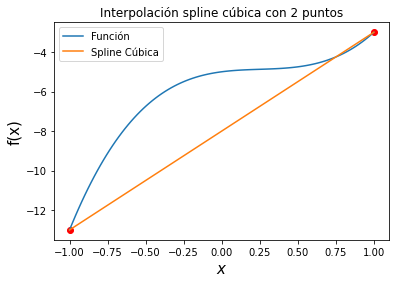

In [7]:
orden1 = 2

xp = np.linspace(-1, 1, orden1)
puntos = np.array([[xi, f(xi)] for xi in xp])
coefs= spline_coefs(puntos)

x = np.linspace(-1, 1, 100)
funcion = f(x)
spline = [spline_eval(xi, coefs, puntos) for xi in x]

plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x, funcion, label='Función')
plt.plot(x, spline, label='Spline Cúbica')
plt.xlabel('$x$',size=15)
plt.ylabel('f(x)',size=15)
plt.title('Interpolación spline cúbica con 2 puntos')
plt.legend()

Se puede apreciar que para un spline cúbica, usando solo 2 puntos, no se tiene una buena aproximación.

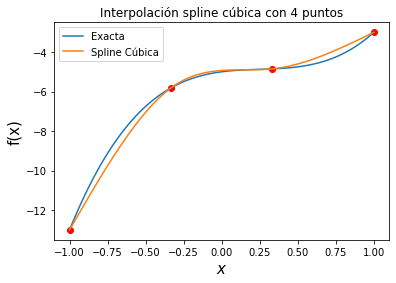

In [8]:
orden2 = 4


xp = np.linspace(-1, 1, orden2)
puntos = np.array([[xi, f(xi)] for xi in xp])
coefs= spline_coefs(puntos)

x = np.linspace(-1, 1, 100)
funcion = f(x)
spline = [spline_eval(xi, coefs, puntos) for xi in x]

plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x, funcion, label='Exacta')
plt.plot(x, spline, label='Spline Cúbica')
plt.xlabel('$x$',size=15)
plt.ylabel('f(x)',size=15)
plt.title('Interpolación spline cúbica con 4 puntos')
plt.legend()

Se puede apreciar que con 4 puntos equidistantes, la interpolación se ajusta mucho mejor a la curva real de la función.